# Programming Exercise 7: K-means Clustering and Principal Component Analysis
*Code's author: Natália Tenório Maia*<br>
*Solution for [Exercise 7](https://www.coursera.org/learn/machine-learning/home/week/8) of Coursera's Machine Learning course by Andrew Ng.*
<br>
<br>
There are many different ways to solve this exercise. Here you will learn just one possible way, where I tried to stick with the original idea proposed in the exercise's pdf.
<br>
<br>
In this exercise, you will implement the K-means clustering algorithm and apply it to compress an image. In the second part, you will use principal component analysis to find a low-dimensional representation of face images.

## Part 1 - K-means clustering

In this this exercise, you will implement the K-means algorithm and use it for image compression. You will first start on an example 2D dataset that will help you gain an intuition of how the K-means algorithm works. After that, you will use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

**Goal:** Implement K-means algorithm for image compression.
<br>
### Importing data

In [1]:
import numpy as np                       # package for scientific computing
import matplotlib.pyplot as plt          # plotting library
from mpl_toolkits.mplot3d import Axes3D  # for 3d plotting
from scipy.io import loadmat             # package for reading MatLab files
from PIL import Image                    # for image processing


# Load an example dataset that we will be using:
dataset = loadmat("ex7data2.mat")
X = dataset['X']
X.shape

(300, 2)

### Implementing K-means

The K-means algorithm repeatedly carries out two steps: (i) Assigning each training example x(i) to its closest centroid, and (ii) Recomputing the mean of each centroid using the points assigned to it.

#### (i) Finding the closest centroids

For every example $i$ we set $c^{(i)}=j$ for $j$ that minimizes $|x^{(i)}-\mu_{j}|^{2}$, where $c^{(i)}$ is the index (label) of the centroid which is closest to $x^{(i)}$, while $\mu_{j}$ is the position (value) of the $j$’th centroid.

In [2]:
def findClosestCentroids(X, centroids):
    K = len(centroids)
    idx = np.zeros(len(X), dtype=int)
    for i in range(len(X)):
        diff = np.zeros(K)
        for j in range(K):
            diff[j] = (np.sqrt(sum( (X[i,:] - centroids[j,:])**2 )))**2
        idx[i] = np.argmin(diff)
    return idx

In [3]:
# Select an initial set of centroids:
K = 3; # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]]);

idx = findClosestCentroids(X, initial_centroids)
idx[:3]

array([0, 2, 1])

The result above is in accordance with ex7.m .

#### (ii) Computing centroid means
The second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid k we set $\mu_{k}=\frac{1}{|C_{k}|}\sum_{i\in C_{k}}x^{(i)}$, where $C_{k}$ is the number of examples that are assigned to centroid $k$.

In [4]:
def computeCentroids(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K,n))
    for i in range(K):
        Ck = np.where(idx == i)[0]
        centroids[i] = sum(X[Ck,:])/len(Ck)
    return centroids

computeCentroids(X, idx, K)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

The result above is in accordance with ex7.m .

### K-means on example dataset

In [5]:
# =========================================== K-means algorithm ===============================================
def runkMeans(X, centroids, MxIt):
    K = len(centroids)
    for i in range(MxIt):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx
# =============================================================================================================

# Applying K-means to the dataset X:
MxIt=10
final_centroids, idx = runkMeans(X,initial_centroids,MxIt)
final_centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

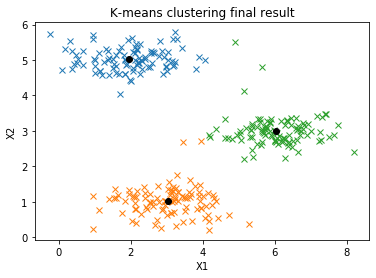

In [6]:
k0s = np.where(idx==0)[0]
k1s = np.where(idx==1)[0]
k2s = np.where(idx==2)[0]

# Plotting data after assigning them to the final centroids:
plt.plot(X[k0s,0],X[k0s,1],'x'); plt.plot(X[k1s,0],X[k1s,1],'x'); plt.plot(X[k2s,0],X[k2s,1],'x')
plt.xlabel('X1'); plt.ylabel('X2'); plt.title('K-means clustering final result');
# Plotting final centroids:
plt.plot(final_centroids[:,0],final_centroids[:,1],'o',color='black');

This is in accordance with Figure 1 in ex7.pdf .

### Random initialization

A good strategy for initializing the centroids is to select random examples from the training set.

In [7]:
def kMeansInitCentroids(X, K):
    # Generates a list of K non-repetitive random numbers in the interval [0,len(X)]:
    rand = np.random.choice(range(len(X)), K, replace=False)
    # random initial centroids:
    initial_centroids = X[rand,:]
    return initial_centroids

### Image compression with K-means

In this exercise, you will apply K-means to image compression. In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.

Bit depth refers to the color information stored in an image. The larger the number of bits, the more shades of grey the image will have, improving its quality and increasing the file size. The number of colors that an image can have depends on the number of bits in the following way:

$$
n_{color} = 2^{n_{bit}}.$$

Our image contains 2$^{24}$ colors, which is more than 16 million colors. In this part of the exercise, you will reduce the number of colors to 16.

By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits of color information in the entire image are necessary to represent 16 possibilities of color).

In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.

#### K-means on pixels

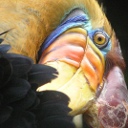

In [8]:
# Reading the image:
im = Image.open('bird_small.png')
im

In [9]:
# Extracting the pixel data from the image:
im_data = np.array(im)
print("Shape of the array: ",im_data.shape)
im_data[:2,:2,:]

Shape of the array:  (128, 128, 3)


array([[[219, 180, 103],
        [230, 185, 116]],

       [[230, 193, 119],
        [224, 192, 120]]], dtype=uint8)

The three-dimensional array can be explained as following: the image is 128$\times$128 pixels large, and to each pixel 3 numerical values from 0 to 255 (of red, blue and green intensities) are assigned. In the result printed above we can see the first two rows and first two columns of the dataset, with each entry displaying 3 values instead of only 1.

If we want to know the intensity of the color red of the pixel at row 50 and column 33, we print the following:

In [10]:
im_data[50,33,0]

175

But if instead we want to know the intensity of the color green of that same pixel, we would replace the 0 by 1 in the code line above; and if we wanted the intensity of the blue color, we would have to replace 0 by 2.

In [11]:
# Let's reorganize the data in the following way in order to be able to use K-means with it:
X = im_data.reshape(-1,3)
X.shape

(16384, 3)

Now the RGB values of each of the 128x128 pixels are given as 3 columns in the dataset X.

In [12]:
X[:5]

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       [223, 185, 105],
       [225, 179, 103]], dtype=uint8)

Now we will use K-means to help us find which are the most dominant 16 colors of the image that we want to compress.

In [13]:
K = 16        # number of colors we want the compressed image to have
MxIt = 10     # number of iterations for the k-means algorithm

# Let's divide by 255 so that all values are in the range [0,1]:
X = im_data.reshape(-1,3); X = X/255;

initial_centroids = kMeansInitCentroids(X, K)
final_centroids, idx = runkMeans(X,initial_centroids,MxIt)

In [14]:
final_centroids[:5]

array([[0.46355095, 0.34151557, 0.21843895],
       [0.85777511, 0.70899809, 0.4534907 ],
       [0.13851527, 0.14676461, 0.13874305],
       [0.20904885, 0.19645096, 0.18666106],
       [0.80495583, 0.72822129, 0.71373626]])

In [15]:
idx

array([1, 1, 1, ..., 3, 3, 3])

We can now recover the image from the indices (idx) by mapping each pixel (specified by its index in idx) to the centroid value:

In [16]:
# Reshapes the recovered image into proper dimensions:
X_recovered = (final_centroids[idx, :]).reshape(im_data.shape)
X_recovered.shape

(128, 128, 3)

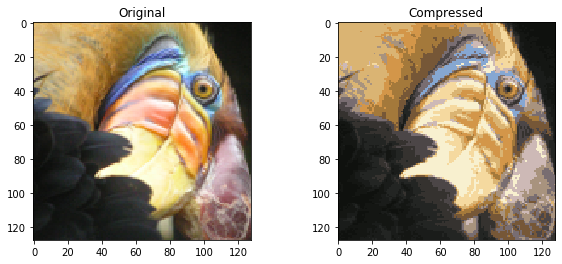

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(im_data); plt.title('Original');
plt.subplot(1,2,2); plt.imshow(X_recovered); plt.title('Compressed');

## Part 2: Principal Component Analysis

In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### Example dataset

To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation.

In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

In [18]:
# Importing data:
dataset = loadmat('ex7data1.mat')
X = dataset['X']
X[:3]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472]])

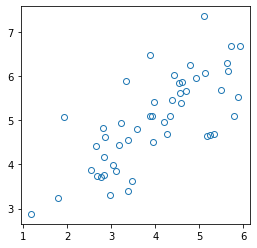

In [19]:
# Visualize data:
plt.plot(X[:,0],X[:,1],'o',mfc='none'); plt.gca().set_aspect('equal');

### Implementing PCA

In this part of the exercise, you will implement PCA. PCA consists of two computational steps: First, you compute the covariance matrix of the data:
$$
\Sigma = \frac{1}{m}X^{T}X.$$

Then, you use Python's np.linalg.svd() function to compute the eigenvectors U1, U2, ..., Un. These will correspond to the principal components of variation in the data.

Before using PCA, it is important to **first normalize** the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. After normalizing the data, you can run PCA to compute the principal components.

In [20]:
# Normalizing data

# Feature Normalization function used in ex7.m:
def FN(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

Xnorm = FN(X)[0]
m = len(X)

# Covariance matrix:
Sigma = (1/m)*np.matmul(Xnorm.T,Xnorm)
Sigma

array([[0.98      , 0.72081977],
       [0.72081977, 0.98      ]])

In [21]:
# =========================================== PCA algorithm ===============================================
def pca(X):
    Xnorm = FN(X)[0]                        # Normalized input
    m = len(X)                              # Number of examples
    Sigma = (1/m)*np.matmul(Xnorm.T,Xnorm)  # Covariance matrix
    U,S,V = np.linalg.svd(Sigma)            # Singular Value Decomposition (SVD) function
    return U,S
# =========================================================================================================

U,S = pca(X)
U[:,0]

array([-0.70710678, -0.70710678])

The result above agrees with ex7_pca.m and ex7.pdf.

### Dimensionality Reduction with PCA

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

In this part of the exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space.

#### Projecting the data onto the principal components

You are given a dataset X, the principal components U, and the desired number of dimensions to reduce to K. You should project each example in X onto the top K components in U (which I call $U_{red}$, where *red* stands for reduced):
$$
Z = XU_{red}.$$

In [22]:
def projectData(X, U, K):
    Z = np.matmul(X,U[:,:K]) ;
    return Z

#  Projecting the data onto K=1 dimension:
K = 1
Z = projectData(Xnorm, U, K)
Z[0]

array([1.48127391])

The result above agrees with ex7.pdf .
#### Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space:
$$
X_{rec} = ZU^{T}_{red}.$$

In [23]:
def recoverData(Z, U, K):
    Xrec = np.matmul(Z,U[:,:K].T)
    return Xrec

Xrec = recoverData(Z, U, K)
Xrec[0]

array([-1.04741883, -1.04741883])

The result above agrees with ex7.pdf .

#### Visualizing the projections

We will now plot both the projection and approximate reconstruction to show how the projection affects the data. In the graph below, the original data points are indicated with the blue circles, while the projected data points are indicated with the orange circles. The projection effectively only retains the information in the direction given by U1.

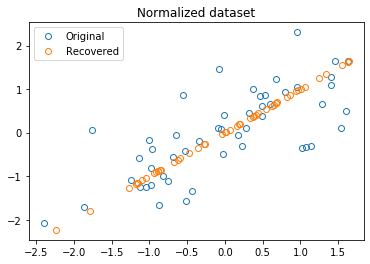

In [24]:
plt.plot(Xnorm[:,0],Xnorm[:,1],'o',mfc='none',label='Original');
plt.plot(Xrec[:,0],Xrec[:,1],'o',mfc='none',label='Recovered');
plt.legend(); plt.title("Normalized dataset");

### Face Image Dataset

In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset X of face images, each 32×32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024).

In [25]:
# Loading data:
dataset = loadmat('ex7faces.mat')
X = dataset['X']
X.shape

(5000, 1024)

In [26]:
# This displays data stored in X in a 2D grid:
def displaydata(X, figsize):
    # Determines the number of rows, cols of the entire figure:
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        m = 1; n = X.size
        X = X[None]  # transforms X into a 1xn array
    else:
        raise IndexError('The input X should be a 1 or 2 dimensional numpy array.')
    # For each individual example to be displayed, we have to determine its dimensions:
    ex_width = int(np.round(np.sqrt(n))); ex_height = int(np.round(n/ex_width))        
    # Determines the number of items to be displayed in the figure:
    fig_rows = int(np.floor(np.sqrt(m))); fig_cols = int(np.ceil(m /fig_rows))
    # Creates a figure (fig) with an array (ax_array) of subplots:
    fig, ax_array = plt.subplots(fig_rows, fig_cols, figsize=figsize)
    # Adjust spacing between subplots:
    fig.subplots_adjust(wspace=0.1, hspace=0.1)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()
    for i in range(len(ax_array)):
        ax_array[i].imshow(X[i].reshape(ex_width, ex_height, order='F'),cmap='gray'); ax_array[i].axis('off')

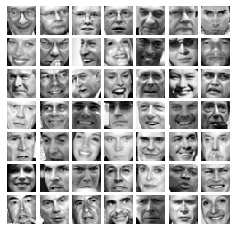

In [27]:
displaydata(X[:49], (4,4))

#### PCA on Faces

After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in U (each row) is a vector of length n (where for the face dataset, n = 1024). It turns out that we can visualize these principal components by reshaping each of them into a 32 × 32 matrix that corresponds to the pixels in the original dataset. We should display the first 36 principal components that describe the largest variations.

In [28]:
# Running PCA:
U,S = pca(X)
U.shape

(1024, 1024)

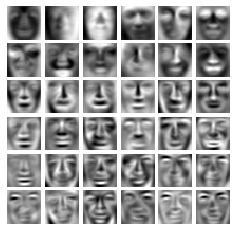

In [29]:
# Displaying images using the first 36 principal components:
displaydata(U[:, :36].T, (4, 4))

#### Dimensionality Reduction

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

In [30]:
Xnorm = FN(X)[0]

#  Projecting the data onto K=100 dimensions:
K = 100
Z = projectData(Xnorm, U, K)
Z.shape

(5000, 100)

To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

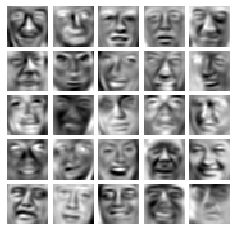

In [31]:
# Reconstruction:
Xrec = recoverData(Z, U, K)
displaydata(Xrec[:25], (4,4))

Let's compared the result above with the original images to get a sense of how much info we lost:

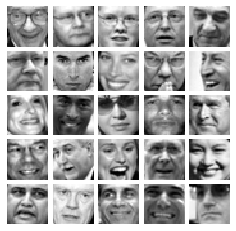

In [32]:
# Original:
displaydata(X[:25], (4,4))

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10×) in the dataset size that can help speed up your learning algorithm significantly.

### Optional (ungraded) exercise: PCA for visualization

In the earlier K-means image compression exercise, you used the K-means algorithm in the 3-dimensional RGB space. Below is the code to visualize the final pixel assignments in this 3D space using the scatter function. Each data point is colored according to the cluster it has been assigned to. You can drag your mouse on the figure to rotate and inspect this data in 3 dimensions.

In [33]:
im = Image.open('bird_small.png')      # Reading image
im_data = np.array(im)                 # Extracting pixel data
X = im_data.reshape(-1,3); X = X/255;  # Reorganizing data to be able to use K-means

# Running K-menas clustering:
K = 16      
MxIt = 10 
initial_centroids = kMeansInitCentroids(X, K)
final_centroids, idx = runkMeans(X,initial_centroids,MxIt)

<font color='red'><b>OBS:</b></font> **You might need to run the cell below manually in order to see the 3D plot. If you just hit "Run All" on this Jupyter notebook, the plot might not be visible. This is probably a bug that hasn't been fixed by the time I'm uploading this notebook to my GitHub.**

<IPython.core.display.Javascript object>


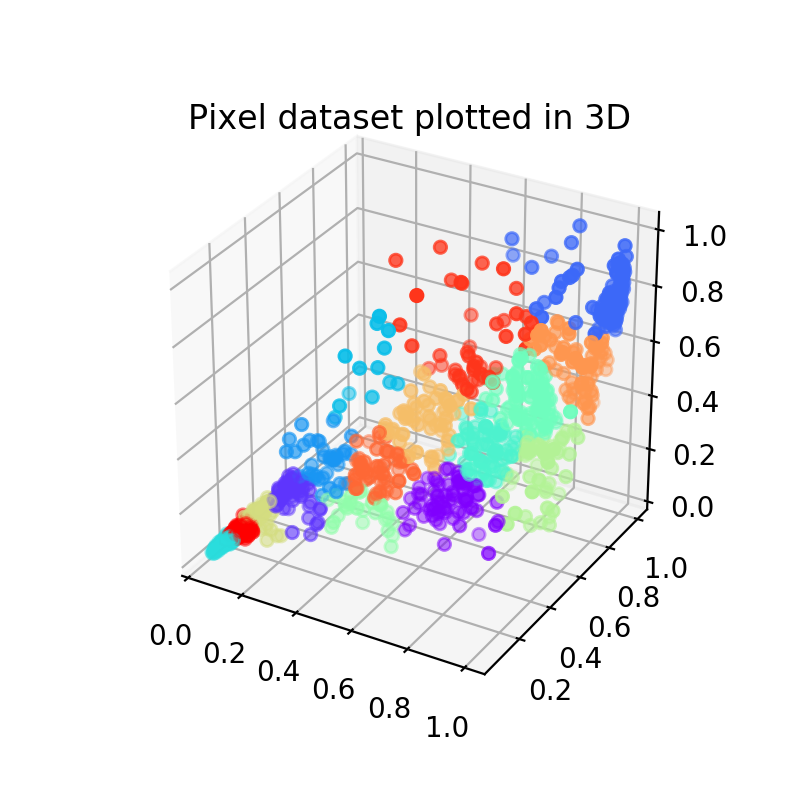

In [36]:
%matplotlib notebook
# Sampling 1000 random indexes since working with all the data is too expensive:
rand = np.random.choice(len(X), size=1000, replace=False)

# Plotting:
fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X[rand, 0], X[rand, 1], X[rand, 2], cmap='rainbow', c=idx[rand])
ax.set_title('Pixel dataset plotted in 3D');
plt.show()

Visualizing datasets in 3 dimensions or greater can be cumbersome. Therefore, it is often desirable to only display the data in 2D even at the cost of losing some information. In practice, PCA is often used to reduce the dimensionality of data for visualization purposes. In the next part, you will apply your implementation of PCA to the 3-dimensional data to reduce it to 2 dimensions and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the “best” view.

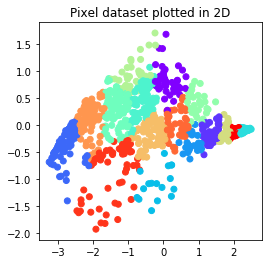

In [35]:
# Running PCA:
U,S = pca(X)

# Projecting the data onto K=2 dimensions:
Xnorm = FN(X)[0]
K = 2
Z = projectData(Xnorm, U, K)

# Plotting:
%matplotlib inline

fig = plt.figure(figsize=(4,4)); ax = fig.add_subplot(1,1,1)
ax.scatter(Z[rand, 0], Z[rand, 1], cmap='rainbow', c=idx[rand])
ax.set_title('Pixel dataset plotted in 2D');

End of exercise 7.